In [6]:
#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv(r"C:\Users\91739\Downloads\Company_Data.csv")
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [9]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [10]:
#categorical_features

categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
print('categorical_features:', categorical_features)

categorical_features: ['ShelveLoc', 'Urban', 'US']


In [11]:
numeric_features = [feature for feature in data.columns if data[feature].dtypes != 'O']
print('numeric features:', numeric_features, '\n')

numeric features: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'] 



# Feature Engineering

Converting sales into categorical feature we will make 3 categories in sales like low, medium and good sales.

<AxesSubplot:xlabel='Sales', ylabel='Count'>

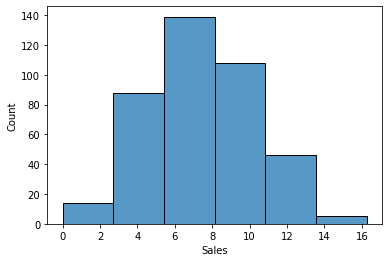

In [12]:
sns.histplot(data.Sales,bins=6)

In [13]:
data.Sales.max() / 3

# diving by 3 since we are making 3 categories
# each category with width 5.42

5.423333333333333

In [14]:
data1 = data.copy()
data1['Sales_category'] = pd.cut(x = data1['Sales'], bins = [0, 5.5 ,11, 17], labels=['Low','Medium','High'], right = False)
data1 = data1.drop(columns=['Sales'])


In [15]:
data1.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_category
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Medium
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Medium
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


# Visualization

<AxesSubplot:xlabel='Sales_category', ylabel='count'>

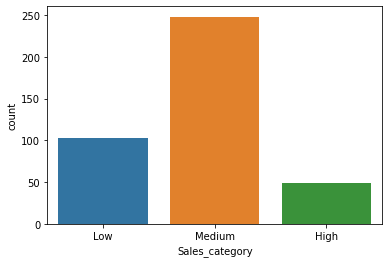

In [16]:
sns.countplot(data1['Sales_category'])

In [17]:
data2 = data1.copy()

for feature in numeric_features:
    Q1,Q3 = np.percentile(data[feature], [25,75])
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    outliers = data[feature][(data[feature] < ll) |  (data[feature] > ul)]

    data2=data2.drop(outliers.index[:] , errors="ignore")

    outliers=0

In [18]:
data1.shape

(400, 11)

In [19]:
data2.shape

(392, 11)

8 outliers dropped

# Data Pre-Processing

In [20]:

y = data2['Sales_category']
x= data2.drop(['Sales_category'], axis=1)

In [21]:
x = pd.get_dummies(x) # encoding input categorical variables

In [22]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [23]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [24]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (313, 14)
Shape of X_test:  (79, 14)
Shape of y_train:  (313,)
Shape of y_test (79,)


# Feature selection

In [25]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [26]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x, y)


In [27]:
# summarize scores
scores = fit.scores_
features = fit.transform(x)

In [28]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

,Score,Feature
4,193.077575,Price
2,131.019973,Advertising
5,93.806019,Age
8,69.563239,ShelveLoc_Good
1,63.584603,Income
7,47.066783,ShelveLoc_Bad
3,32.699398,Population
9,12.340114,ShelveLoc_Medium
12,6.672444,US_No
0,4.655268,CompPrice


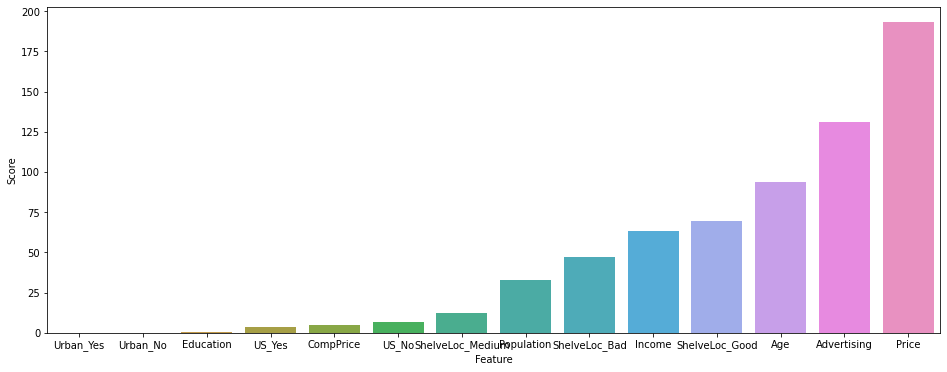

In [29]:
plt.figure(figsize=(16,6))
sns.barplot(x='Feature', y="Score", data=score_df, order=score_df.sort_values('Score').Feature)
plt.show()

In [30]:
model_data_x = x[['Price','Advertising','Population','Income','Age','ShelveLoc_Good','ShelveLoc_Bad',
                  'ShelveLoc_Medium', 'US_No','CompPrice']]

In [31]:
model_data_x

,Price,Advertising,Population,Income,Age,ShelveLoc_Good,ShelveLoc_Bad,ShelveLoc_Medium,US_No,CompPrice
0,120,11,276,73,42,0,1,0,0,138
1,83,16,260,48,65,1,0,0,0,111
2,80,10,269,35,59,0,0,1,0,113
3,97,4,466,100,55,0,0,1,0,117
4,128,3,340,64,38,0,1,0,1,141
...,...,...,...,...,...,...,...,...,...,...
395,128,17,203,108,33,1,0,0,0,138
396,120,3,37,23,55,0,0,1,0,139
397,159,12,368,26,40,0,0,1,0,162
398,95,7,284,79,50,0,1,0,0,100


In [32]:
model_data_y = y
model_data_y

array([2, 0, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 2,
       2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 0, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0,

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(model_data_x, model_data_y, test_size=0.2,random_state=40)

In [34]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (313, 10)
Shape of X_test:  (79, 10)
Shape of y_train:  (313,)
Shape of y_test (79,)


Building Random Forest Classifier

In [35]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, model_data_x, model_data_y, cv=kfold)

print('Batchwise accuracy is:', '\n', results, '\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.7        0.675      0.74358974 0.71794872 0.74358974 0.58974359
 0.74358974 0.82051282 0.71794872 0.74358974] 

Overall accuracy is: 0.7195512820512822


In [36]:
#Grid search for hyper parameter tuning

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [37]:
print(grid.best_score_)
print(grid.best_params_) 

0.7095512820512819
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 75}


In [38]:
#Building final model on grid.best_params_ parameters

model_kf =grid.best_estimator_
model_kf.fit(x, y)

results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3)) 

Accuracy with k fold validation 0.71


In [39]:
model = grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred))

Accuracy with train test split: 0.6835443037974683


In [40]:
print(classification_report(y_test, pred))  

              precision    recall  f1-score   support

           0       0.50      0.25      0.33         8
           1       0.60      0.32      0.41        19
           2       0.71      0.88      0.79        52

    accuracy                           0.68        79
   macro avg       0.60      0.48      0.51        79
weighted avg       0.66      0.68      0.65        79



<AxesSubplot:>

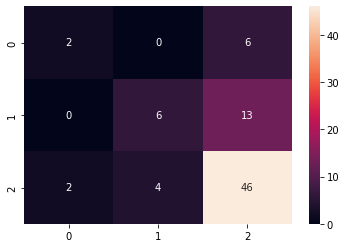

In [41]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True) 